### USML

#### PCA analysis
- Through dimensionality reduction, we will find the PC in the interval with the widest variance.

data reading and filtering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import altair as alt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import umap

from sklearn.decomposition import NMF
from sklearn.preprocessing import LabelEncoder

In [2]:
df_employee=pd.read_csv('employee_survey_data.csv')
df_employee.head() # we can see relationship with 3 features.
df_general = pd.read_csv('general_data.csv')
df_manager=pd.read_csv('manager_survey_data.csv')
df_general['EmployeeID'].equals(df_manager['EmployeeID'])
df_general['EmployeeID'].equals(df_employee['EmployeeID'])
df_general = df_general.merge(df_employee[['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction','WorkLifeBalance']], on='EmployeeID')
df_general = df_general.merge(df_manager[['EmployeeID', 'JobInvolvement', 'PerformanceRating']], on='EmployeeID')
df_general.dropna(inplace=True)

In [3]:
# create a list of our conditions
conditions = [
    (df_general['Age'] <= 20),
    (df_general['Age'] > 20) & (df_general['Age'] <= 30),
    (df_general['Age'] > 30) & (df_general['Age'] <= 40),
    (df_general['Age'] > 40) & (df_general['Age'] <= 50),
    (df_general['Age'] > 50) & (df_general['Age'] <= 60)
    ]

# create a list of the values we want to assign for each condition
values = ['less_20', '20_30', '30_40', '40_50', '50_60']

# create a new column and use np.select to assign values to it using our lists as arguments
df_general['Age_tier'] = np.select(conditions, values)

In [3]:
df_hr=pd.read_csv('hr_final.csv')

In [8]:
df_hr.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)

In [9]:
df_hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'Age_tier', 'distancehome_tier', 'JobRole_tier', 'MonthlyIncome_tier'],
      dtype='object')

In [7]:
df_hr.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,...,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age_tier,distancehome_tier,JobRole_tier,MonthlyIncome_tier
0,0,51,0,2,2,6,2,1,0,1,...,0,3,3,3.0,4.0,2.0,3,3,4,5
1,1,31,1,1,1,10,1,1,0,1,...,4,2,4,3.0,2.0,4.0,1,3,1,3
2,2,32,0,1,1,17,4,4,1,4,...,3,3,3,2.0,2.0,1.0,1,2,1,5
3,3,38,0,0,1,2,5,1,1,3,...,5,2,3,4.0,4.0,3.0,1,4,4,4
4,4,32,0,2,1,10,1,3,1,1,...,4,3,3,4.0,1.0,3.0,1,3,1,1


In [10]:
df_hr.shape

(4382, 29)

In [8]:
others = df_general.select_dtypes('object').columns
others

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Age_tier'],
      dtype='object')

In [9]:
le = LabelEncoder()
for col in others:
    df_general[col] = le.fit_transform(df_general[col])

In [10]:
df_general.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Age_tier
0,51,0,2,2,6,2,1,1,0,1,...,6,1,0,0,3.0,4.0,2.0,3,3,3
1,31,1,1,1,10,1,1,2,0,1,...,3,5,1,4,3.0,2.0,4.0,2,4,1
2,32,0,1,1,17,4,4,3,1,4,...,2,5,0,3,2.0,2.0,1.0,3,3,1
3,38,0,0,1,2,5,1,4,1,3,...,5,8,7,5,4.0,4.0,3.0,2,3,1
4,32,0,2,1,10,1,3,5,1,1,...,2,6,0,4,4.0,1.0,3.0,3,3,1
5,46,0,2,1,8,3,1,6,0,4,...,5,7,7,7,3.0,2.0,2.0,3,3,2
6,28,1,2,1,11,2,3,7,1,2,...,2,0,0,0,1.0,3.0,1.0,3,4,0
7,29,0,2,1,18,3,1,8,1,2,...,2,0,0,0,1.0,2.0,3.0,3,4,0
8,31,0,2,1,1,3,1,9,1,3,...,2,9,7,8,2.0,4.0,3.0,3,4,1
9,25,0,0,1,7,4,3,10,0,4,...,2,6,1,5,2.0,1.0,3.0,3,3,0


In [11]:
df_general.drop(columns=['Age','DistanceFromHome','EmployeeID',], axis = 1, inplace = True)

In [30]:
df_hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'Age_tier', 'distancehome_tier', 'JobRole_tier', 'MonthlyIncome_tier'],
      dtype='object')

In [32]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4382 entries, 0 to 4381
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4382 non-null   int64  
 1   Attrition                4382 non-null   int64  
 2   BusinessTravel           4382 non-null   int64  
 3   Department               4382 non-null   int64  
 4   DistanceFromHome         4382 non-null   int64  
 5   Education                4382 non-null   int64  
 6   EducationField           4382 non-null   int64  
 7   Gender                   4382 non-null   int64  
 8   JobLevel                 4382 non-null   int64  
 9   JobRole                  4382 non-null   int64  
 10  MaritalStatus            4382 non-null   int64  
 11  MonthlyIncome            4382 non-null   int64  
 12  NumCompaniesWorked       4382 non-null   float64
 13  PercentSalaryHike        4382 non-null   int64  
 14  StockOptionLevel        

### Set X and y 

In [33]:
X = df_hr[['BusinessTravel','Department','Education', 'EducationField', 'Gender', 'JobLevel','MaritalStatus','NumCompaniesWorked','PercentSalaryHike', 'StockOptionLevel','TrainingTimesLastYear','YearsSinceLastPromotion','YearsWithCurrManager', 'JobInvolvement', 'PerformanceRating','EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'Age_tier', 'distancehome_tier', 'JobRole_tier', 'MonthlyIncome_tier']]
y = df_hr[['Attrition']]
print(X.shape, y.shape)

(4382, 22) (4382, 1)


In [34]:
!pip install imblearn

In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X ,y = smote.fit_resample(X ,y)
print(X.shape ,y.shape)

ImportError: cannot import name '_ClassNamePrefixFeaturesOutMixin' from 'sklearn.base' (C:\Users\dicod\Anaconda3\lib\site-packages\sklearn\base.py)

In [38]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
sklearn_pca_X = pca.fit_transform(X)

### Scarling and Dimension reduction

In [39]:
# Scarlings
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std[0]

array([ 0.590095  ,  1.40151526, -0.89045337, -0.93794569, -1.22288356,
       -0.96194289, -0.1360836 , -0.67798151, -1.14963343, -0.93231749,
        2.4833987 , -0.67967357, -1.15603522,  0.37927287, -0.42671764,
        0.25369366,  1.15721459, -1.08105955,  1.79821965,  0.01150277,
        1.73070675,  1.45042972])

In [40]:
# for reduce the dimension
X_std[0].shape

(22,)

In [41]:
X_std.T

array([[ 0.590095  , -0.91240139, -0.91240139, ...,  0.590095  ,
         0.590095  ,  0.590095  ],
       [ 1.40151526, -0.49457608, -0.49457608, ..., -0.49457608,
        -0.49457608,  1.40151526],
       [-0.89045337, -1.86643304,  1.06150595, ...,  1.06150595,
        -0.89045337, -0.89045337],
       ...,
       [ 0.01150277,  0.01150277, -0.92192545, ...,  0.94493098,
        -1.85535366, -0.92192545],
       [ 1.73070675, -0.8156694 , -0.8156694 , ...,  0.8819147 ,
        -0.8156694 ,  0.8819147 ],
       [ 1.45042972, -0.07319081,  1.45042972, ..., -0.83500107,
        -0.07319081, -1.59681134]])

In [42]:
# Covariance Matrix of features
features = X_std.T
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.00022826e+00 -9.16548493e-03  3.07495807e-03 -1.66775019e-02
  -3.89512141e-02  4.58836046e-02  2.71945298e-02  2.40516547e-02
  -3.08535432e-02  5.44485096e-03 -4.15470537e-02 -3.31931737e-02
  -2.31388241e-02  2.49542471e-03 -1.70045348e-02  2.73357737e-03
  -3.20627977e-02 -1.11259316e-02 -2.66230881e-03 -2.15150758e-02
   2.41149578e-02 -1.74148971e-02]
 [-9.16548493e-03  1.00022826e+00 -3.73299181e-03  1.48134932e-02
   2.68017229e-03  4.29080062e-03 -4.47736263e-02 -4.23369016e-03
  -6.82477677e-03  9.52422129e-03  1.26162841e-02  1.39443878e-02
   1.69463506e-02  6.12215356e-03 -2.40588416e-02 -7.86884306e-03
   2.77277098e-02  2.13120039e-02 -2.74845095e-02 -5.21734547e-03
   2.77734489e-02 -3.91740808e-02]
 [ 3.07495807e-03 -3.73299181e-03  1.00022826e+00  1.40576664e-02
  -1.76750731e-02  4.58319610e-02  2.44678084e-02 -1.62140396e-02
  -4.10636937e-02  2.38691115e-03  9.94153063e-03  2.34622078e-02
   5.64605883e-03 -1.92780766e-02 -3.57003126e-02 -4.41380094e-02
  -5.0

In [18]:
# Eigen Vectors and Eigen Values from Covariance Matrix
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [43]:
print('\nEigenvators \n%s' %eig_vecs)


Eigenvators 
[[ 4.02795611e-01  1.28524153e-02 -3.40461485e-02 -2.05688842e-01
   1.74101267e-01  3.19267738e-01 -8.25896618e-03  2.85247299e-03
  -4.12043749e-02  3.64246418e-01  6.49955664e-01 -2.13043404e-01
   6.03437116e-02 -1.20572224e-02 -1.89935142e-01 -2.95522546e-02
   5.76759060e-03  3.90405566e-02  1.43102121e-02  6.00960840e-03
   9.88788600e-02  1.60385195e-02  4.60278089e-02  4.48300531e-02
   2.66057972e-02  1.53515640e-02  4.15687755e-02 -1.52660940e-02]
 [ 4.82718010e-04  5.60922634e-02 -1.74736724e-02 -4.92542426e-02
  -2.50433211e-02  8.07878553e-02 -1.92790318e-03  2.43817009e-03
  -1.59887055e-02  2.13236766e-03 -4.55096437e-03  1.96795737e-02
  -4.94508623e-02  4.69766692e-02 -5.44393965e-03 -2.38837243e-01
   5.18971580e-02 -4.39702371e-01  6.06984042e-02 -3.52566092e-01
  -4.04735037e-01 -9.73163980e-02  3.22233662e-01  3.05476650e-01
  -3.48804430e-01 -2.38196850e-02  9.89221307e-02 -3.13205659e-01]
 [-1.61731758e-03  4.09105559e-02 -2.13071696e-02 -6.1792824

In [44]:
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[3.23295345 2.04050934 1.98385836 1.92759835 1.79922968 1.66131411
 0.01888771 0.03230458 0.13354779 0.15664785 0.20919196 0.22390248
 0.3391974  0.51823069 0.74237318 0.86160786 1.12777784 1.11220929
 1.08554049 0.90845147 1.04869457 1.03400922 0.92906241 0.94077267
 0.95427483 0.97989027 1.0058207  0.9985327 ]


In [21]:
# we reduce dimension to 1 dimension, since 1 eigenvector has () variances.
eig_vals[0] / sum(eig_vals)

0.11543627386491091

In [45]:
print(pca.explained_variance_ratio_)

[0.29863575 0.2255753 ]


### binning and sample size adjust

### K_means Analysis

In [33]:
Kx = df_general.to_numpy()

In [34]:
Kx.shape

(4300, 24)

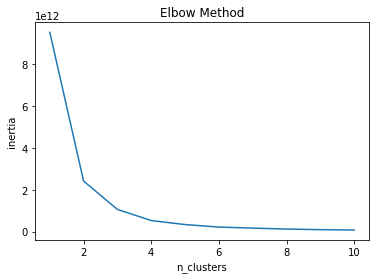

In [35]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(Kx)
    inertia_list.append(kmeans.inertia_)

plt.plot(range(1,11),inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

In [ ]:
 # We select best_n_clusters = 4
best_n_clusters = 4        

In [ ]:
kmeans=KMeans(n_clusters=best_n_clusters)
y_kmeans = kmeans.fit_predict(Kx)
y_kmeans

umap_scaler_km = umap.UMAP(n_components=6)
embeddings_km = umap_scaler.fit_transform(data_to_cluster_scaled)


Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(embeddings_km)
    Sum_of_squared_distances.append(km.inertia_)


plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# data visualization with best_n_cluster
# embeddings[:,0],embeddings[:,1]
for cluster in range(best_n_clusters):
    plt.scatter(Kx[y_kmeans == cluster], Kx[y_kmeans ==cluster], s=100, edgecolor = 'black') #s: marker size

plt.title()
plt.show()


In [ ]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=3)

In [ ]:
umap_scaler_km = umap.UMAP(n_components=6)
embeddings_km = umap_scaler.fit_transform(data_to_cluster_scaled)


Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(embeddings_km)
    Sum_of_squared_distances.append(km.inertia_)


plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# back to our k-means instance. We take 3 clusters on non-reduced data
clusterer.fit(data_to_cluster_scaled)

In [ ]:
# we can then copy the cluster-numbers into the original file and start exploring
df_general['cluster'] = clusterer.labels_

In [ ]:
# e.g. which cluster seems most lgbt-friendly 
df_general.groupby('cluster').size()

In [ ]:
vis_data = pd.DataFrame(embeddings)
vis_data['place'] = data['place']
vis_data['cluster'] = data['cluster']
vis_data['country'] = data['alpha-2']
vis_data.columns = ['x', 'y', 'place', 'cluster','country']

In [ ]:
alt.Chart(vis_data).mark_circle(size=60).encode(
    x='x',
    y='y',
    tooltip=['place', 'country'],
    color=alt.Color('cluster:N', scale=alt.Scale(scheme='dark2')) #use N after the var to tell altair that it's categorical
).interactive()